In [26]:
import sys, os, random
import matplotlib as plt
import matplotlib.pyplot as pyplot
import pandas as pd
import numpy as np
from datetime import datetime, date, timedelta
from sklearn.impute import KNNImputer
# !conda install --yes --prefix {sys.prefix} hdbscan
# data_w.to_csv(r'D:\Internship & Thesis\us_sup1.csv', index = False, header=True)

pd.set_option("display.max_columns", 20)
pd.set_option("display.max_rows", 7)
# datasets
data_w = pd.read_csv("us_sup1.csv").rename(columns = {"Order Date" : "Order_Date"})
data_w

,Order_Date,Ship Mode,Customer ID,Country,City,State,Postal Code,Region,Product ID,Category,...,Product Name,Sales,Quantity,Discount,Profit,Gender,Age,Order Day,Order Month,Order Year
0,2014-01-03,Standard Class,DP-13000,United States,Houston,Texas,77095,Central,OFF-PA-10000174,Office Supplies,...,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512,M,49,3,1,2014
1,2014-01-04,Standard Class,PO-19195,United States,Naperville,Illinois,60540,Central,OFF-LA-10003223,Office Supplies,...,Avery 508,11.784,3,0.2,4.2717,M,70,4,1,2014
2,2014-01-04,Standard Class,PO-19195,United States,Naperville,Illinois,60540,Central,OFF-ST-10002743,Office Supplies,...,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748,M,70,4,1,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9991,2017-12-30,Standard Class,PO-18865,United States,New York City,New York,10009,East,TEC-PH-10004774,Technology,...,Gear Head AU3700S Headset,90.930,7,0.0,2.7279,F,48,30,12,2017
9992,2017-12-30,Standard Class,EB-13975,United States,Fairfield,California,94533,West,OFF-BI-10002103,Office Supplies,...,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,M,28,30,12,2017
9993,2017-12-30,Standard Class,PO-18865,United States,New York City,New York,10009,East,FUR-BO-10003441,Furniture,...,"Bush Westfield Collection Bookcases, Fully Ass...",323.136,4,0.2,12.1176,F,48,30,12,2017


<span style="color:Green; font-family:Papyrus; font-size:2em;">Part I: Data Pre-Processing</span>

### Time Series Regularization

In [27]:
#regulating
ts_data = data_w[["Order_Date", "Sub-Category", "Sales"]].groupby(["Order_Date", "Sub-Category"]).agg({"Sales" : "sum"})
ts_data = ts_data.pivot_table(index = ["Order_Date"], columns = "Sub-Category", values = "Sales").reset_index()
timeframe = pd.DataFrame(pd.date_range(ts_data['Order_Date'].min(), ts_data['Order_Date'].max()), columns=['Order_Date'])
ts_data['Order_Date'] = pd.to_datetime(ts_data['Order_Date'])
ts_data_d = pd.merge(timeframe, ts_data, how="left", on = "Order_Date").set_index('Order_Date')

### KNN Imputation

In [28]:
# # # Filling missing values with KNN
imputer_knn = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
ts_data_d = pd.DataFrame(imputer_knn.fit_transform(ts_data_d), columns=ts_data_d.columns, index = ts_data_d.index)
ts_data_d
# # ts_data_d#.isnull().values.any()
# imputer_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
# ts_data_d = pd.DataFrame(imputer_mean.fit_transform(ts_data_d), columns=ts_data_d.columns, index = ts_data_d.index)

,Accessories,Appliances,Art,Binders,Bookcases,Chairs,Copiers,Envelopes,Fasteners,Furnishings,Labels,Machines,Paper,Phones,Storage,Supplies,Tables
Order_Date,,,,,,,,,,,,,,,,,
2014-01-03,349.2008,44.9028,71.3900,395.9252,407.35112,1078.4488,3039.9664,101.9672,16.4084,225.1104,22.4968,2151.4408,16.4480,450.4552,153.6616,65.9188,630.1482
2014-01-04,291.4608,148.3008,19.4412,3.5400,389.50960,310.7302,2415.9752,7.8864,7.6208,113.1232,11.7840,2023.6422,26.2752,312.8080,272.7360,26.5412,397.8690
2014-01-05,447.2672,590.8608,19.5360,45.6080,523.89700,1383.6484,927.9800,111.9840,16.6784,123.6664,41.6832,478.2974,186.1672,871.6668,515.7732,1299.2720,1043.9518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-28,44.1408,109.3316,29.6480,62.0320,78.85280,454.0760,699.9788,214.5892,13.9600,18.3280,72.4500,1246.6530,4.2800,14.8500,908.8740,70.8548,626.2634
2017-12-29,75.2876,170.7764,34.5800,12.5300,501.06040,2161.1380,2743.9776,70.3440,25.6300,169.5800,11.4736,2648.4654,209.7000,302.3760,596.2740,58.4172,1060.0536
2017-12-30,87.9912,209.3000,35.8824,87.4000,323.13600,504.1848,1295.9688,76.0412,3.0240,169.6884,26.6916,2720.0946,52.5408,90.9300,302.8632,27.1844,761.5614


### Month level aggregation

In [29]:
# Month level aggregation
dicti = {c: "sum" for i, c in enumerate(ts_data_d.columns)}
ts_data_m = ts_data_d.resample('M').agg(dicti)
ts_data_m

,Accessories,Appliances,Art,Binders,Bookcases,Chairs,Copiers,Envelopes,Fasteners,Furnishings,Labels,Machines,Paper,Phones,Storage,Supplies,Tables
Order_Date,,,,,,,,,,,,,,,,,
2014-01-31,10000.725185,7375.255830,1092.338325,4944.574474,14096.819471,26687.459391,68013.669093,2448.431580,442.4516,3644.552513,1072.012938,57129.575548,2261.749532,16305.761464,11421.235935,9335.361653,19602.719379
2014-02-28,9500.775869,7091.947349,1175.710657,4006.071285,14696.089812,23280.918704,66611.514734,2458.426606,424.2872,4190.316815,780.590786,48643.441969,2664.848493,14408.721673,10666.751355,8031.842633,22019.240333
2014-03-31,8850.374385,9106.050230,1123.153525,6644.440274,16813.685051,22509.425791,65403.599893,2406.511180,474.9424,4934.167713,1244.869338,87216.566348,3257.360732,17007.992664,11812.331935,6619.502453,25229.854179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-10-31,9384.902051,8839.702356,1435.896996,13157.308232,16303.697744,20156.890539,73686.423725,2536.483477,438.4584,3666.205306,1012.827145,52754.755663,3026.370885,16130.222227,12414.253458,14826.359337,20633.687862
2017-11-30,11000.584800,9811.425000,1711.808400,7444.920400,12146.969900,23226.756200,82681.150000,2130.503600,477.5132,7738.774800,790.086400,59833.119800,4960.283600,21874.232800,15707.372800,6385.243600,25140.961400
2017-12-31,8869.542284,10242.436519,1312.389932,6483.470811,12544.940001,24722.095513,62986.901642,2087.879026,475.8388,5035.955502,802.221448,63321.094021,4444.452962,14069.207809,14206.887819,8848.719779,22887.282554


### Non-Stationarity Detection: Graphs

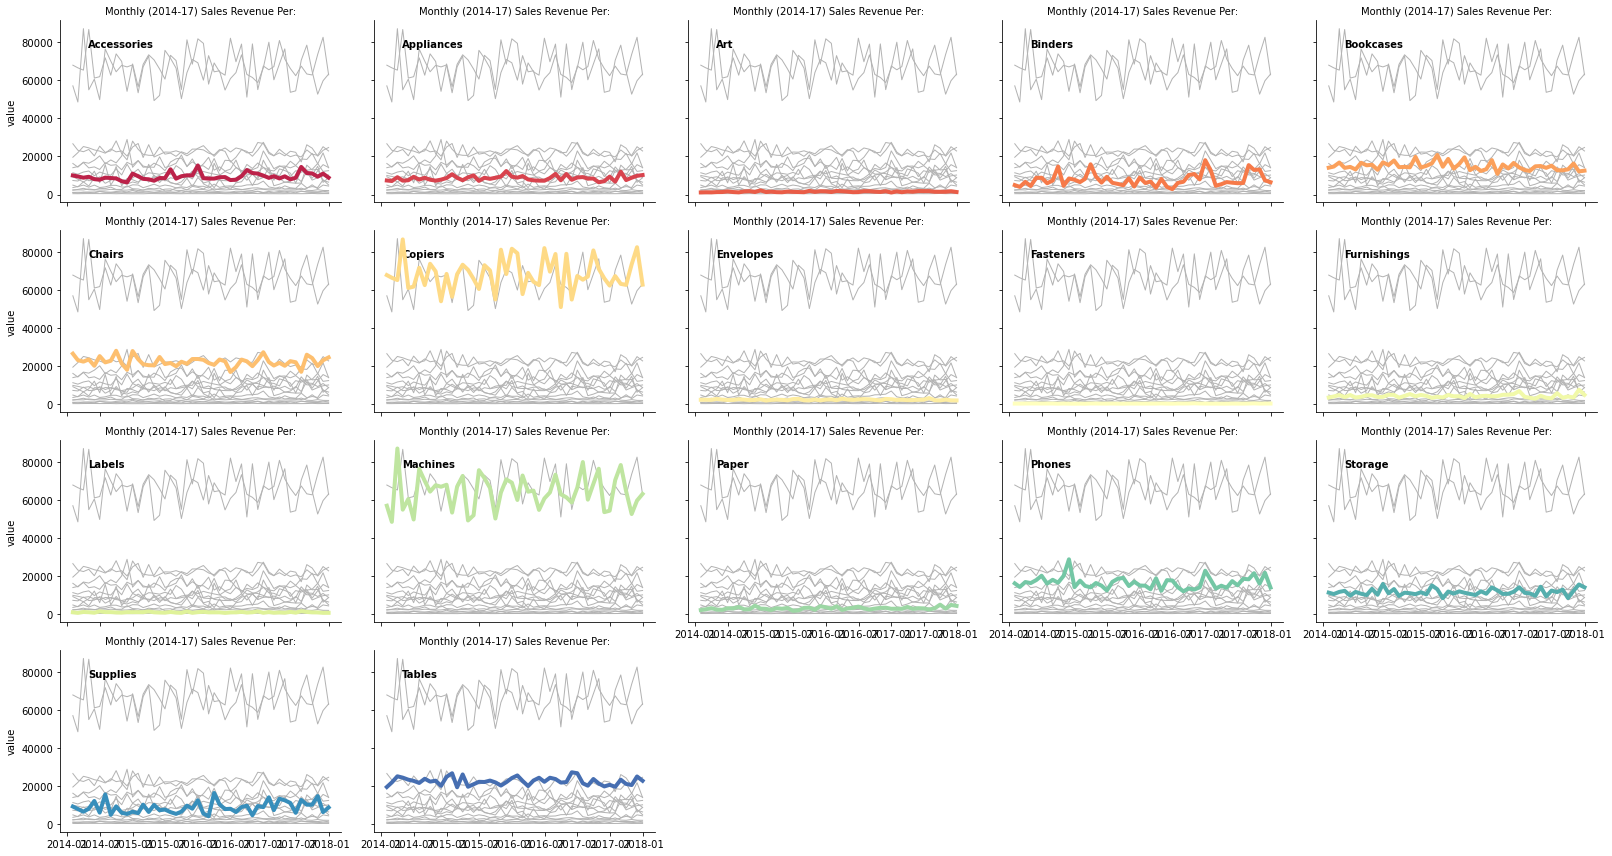

In [30]:
# Non Stationarity detection
from matplotlib import pyplot
from statsmodels.tsa.stattools import adfuller
import plotly.express as px
import seaborn as sns

# # ---------Soft test: Graphs-----------------
ts_data_m_l = ts_data_m.reset_index()
ts_data_m_l = pd.melt(ts_data_m_l, id_vars='Order_Date', value_vars=list(ts_data_m_l.columns)).rename(columns={"variable": "Category"})
ts_data_m_l
g = sns.relplot(data = ts_data_m_l, x = "Order_Date", y = "value",
                col = "Category", hue = "Category",
                kind = "line", palette = "Spectral",   
                linewidth = 4, zorder = 5,
                col_wrap = 5, height = 3, aspect = 1.5, legend = False
               )
#add text and silhouettes
for time, ax in g.axes_dict.items():
    ax.text(.1, .85, time,
            transform = ax.transAxes, fontweight="bold"
           )
    sns.lineplot(data = ts_data_m_l, x = "Order_Date", y = "value", units="Category",
                 estimator = None, color= ".7", linewidth=1, ax=ax
                )
g.set_titles("Monthly (2014-17) Sales Revenue Per:")
g.set_axis_labels("", "value")
g.tight_layout()

### Non-Stationarity Detection: Adfuller Test


In [31]:
def label_stationary (row):
    if row['p_value'] <= 0.05:
        return 'Stationary'
    else:
        return 'Not Stationary'
def highlight(s):
    if s.p_value > 0.05:
        return ['background-color: yellow'] * len(s)
    else:
        return ['background-color: green'] * len(s)
adf_results = {}
for col in ts_data_m.columns.values: 
    adf_results[col] = round(adfuller(ts_data_m[col])[1], 5)
p_value = pd.DataFrame(adf_results.items(), columns=['Category', 'p_value'])
p_value['Stationarity (5% Sign. Level)'] = p_value.apply (lambda row: label_stationary(row), axis=1)
p_value.style.apply(highlight, axis=1)
# p_value <= 0.05: Reject the null hypothesis (not stationary)

,Category,p_value,Stationarity (5% Sign. Level)
0,Accessories,0.000000,Stationary
1,Appliances,0.000000,Stationary
2,Art,0.000000,Stationary
3,Binders,0.000010,Stationary
4,Bookcases,0.776710,Not Stationary
5,Chairs,0.000000,Stationary
6,Copiers,0.000010,Stationary
7,Envelopes,0.000000,Stationary
8,Fasteners,0.000010,Stationary
9,Furnishings,0.001960,Stationary


### Non-Stationarity Removal & Scaling


In [32]:
diff_ord = 1
cols_s = []
cols_assigned_s = {}
for kol_s in ts_data_m.columns:
    if adf_results[kol_s] <= 0.05:
        continue
    cols_s.append(kol_s)
    ts_data_m["d"+kol_s] = ts_data_m[kol_s].diff(periods=1)
    cols_assigned_s['d'+ kol_s] = kol_s

ts_data_m = ts_data_m.drop(columns=cols_s, axis = 1).rename(columns = cols_assigned_s)
ts_data_m = ts_data_m.iloc[diff_ord:]
def max_scaling(df):
    for column in df.columns:
        df[column] = df[column] / df[column].abs().max()
    return df
ts_data_m_n = max_scaling(ts_data_m)
adf_results2 = {}
for col in ts_data_m_n.columns.values: 
    adf_results2[col] = round(adfuller(ts_data_m_n[col])[1], 5)
p_value = pd.DataFrame(adf_results2.items(), columns=['Category', 'p_value'])
p_value['Stationarity (5% Sign. Level)'] = p_value.apply (lambda row: label_stationary(row), axis=1)
p_value.style.apply(highlight, axis=1)

,Category,p_value,Stationarity (5% Sign. Level)
0,Accessories,0.000010,Stationary
1,Appliances,0.000000,Stationary
2,Art,0.000000,Stationary
3,Binders,0.000010,Stationary
4,Chairs,0.000000,Stationary
5,Copiers,0.000020,Stationary
6,Envelopes,0.000000,Stationary
7,Fasteners,0.000010,Stationary
8,Furnishings,0.001630,Stationary
9,Labels,0.000000,Stationary


<span style="color:Green; font-family:Papyrus; font-size:2em;">Part II: Clustering</span>

### Category: Hierarchical Desnity Based | Algorithm: HDSBCAN | Measure: Matrix Profile Distance

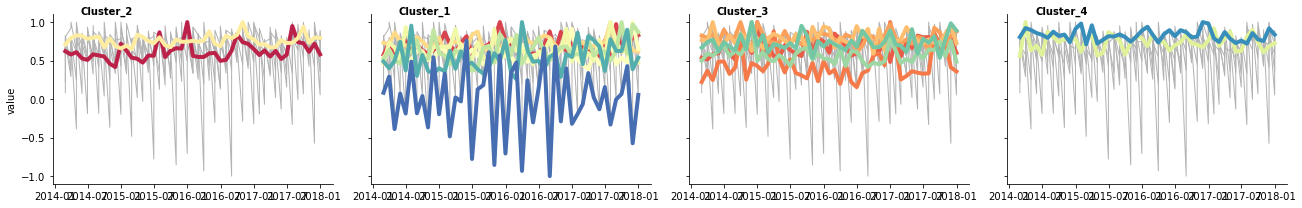

In [33]:
import plotly.express as px
import hdbscan
import stumpy

ts_data_m_n_T = ts_data_m_n.T
ts_data_m_n_T
# ts_data_m_n
def hdbscan_mpd(Ts: pd.DataFrame, metric: str):
    if metric == "mpd":
        mp_matrix = np.zeros((len(Ts), len(Ts)))
        m = 3
        for i in range(len(Ts)):
            for j in range(i+1, len(Ts)):
                distance = stumpy.mpdist(np.asarray(Ts.iloc[:, i]), np.asarray(Ts.iloc[:, j]), m)
                mp_matrix[i, j] = distance
                mp_matrix[j, i] = distance
    
    clusterer = hdbscan.HDBSCAN(metric='precomputed', min_cluster_size=2)
    cluster_model = clusterer.fit(mp_matrix)
    cluster_labels = clusterer.labels_
    return (cluster_model, cluster_labels)
(model, labels) = hdbscan_mpd(ts_data_m_n_T, "mpd")
# hdbscan_mpd(ts_data_m_n_T, "mpd")
# # for i in range(len(ts_data_m_n_T)):
# #     print(labels[i])

ts_data_m_n_T["Cluster"] = labels
# encode
codes = pd.Series(labels).sort_values().unique().tolist()
codes
levels = []
for i in range(1, len(codes) + 1):
    levels.append("Cluster_" + str(i))
levels
ts_data_m_n_T["Cluster"] = ts_data_m_n_T["Cluster"].replace(codes, levels)

#visualization
colmns = list(ts_data_m_n_T.columns)
colmns.remove("Cluster")
ts_data_m_n_T_l = ts_data_m_n_T.reset_index().rename(columns = {"index": "Category"})
ts_data_m_n_T_l = pd.melt(ts_data_m_n_T_l, id_vars=['Category', "Cluster"],
                      value_vars=colmns)

# fig = px.line(ts_data_m_n_T_l, x='Order_Date', y='value', color='Cluster', markers=True, title= "Clustering Monthly Sales Revenue (2014-17)")
# fig.show()

fig = px.line(ts_data_m_n_T_l, x="Order_Date", y="value", color="Cluster", line_group="Category")
fig.show()

g = sns.relplot(data = ts_data_m_n_T_l, x = "Order_Date", y = "value",
                col = "Cluster", hue = "Category",
                kind = "line", palette = "Spectral",   
                linewidth = 4, zorder = 5,
                col_wrap = 5, height = 3, aspect = 1.5, legend = False
               )
#add text and silhouettes
for time, ax in g.axes_dict.items():
    ax.text(.1, 1, time,
            transform = ax.transAxes, fontweight="bold"
           )
    sns.lineplot(data = ts_data_m_n_T_l, x = "Order_Date", y = "value", units="Cluster",
                 estimator = None, color= ".7", linewidth=1, ax=ax
                )
g.set_titles("")
g.set_axis_labels("", "value")
g.tight_layout()

### Clusters Average

In [34]:
ave_dist = ts_data_m_n_T_l[["Cluster", "value", "Order_Date"]].groupby(["Order_Date", "Cluster"]).agg({"value" : "mean"}).reset_index()
# ave_dist
fig3 = px.line(ave_dist, x="Order_Date", y="value", color="Cluster")
fig3.update_layout(plot_bgcolor='rgba(0,0,0,0)')
fig3.show()

### Clusters Distribution

In [35]:
import plotly.express as px
ts_data_m_n_T_d = ts_data_m_n_T.reset_index().rename(columns = {"index": "Category"})
ts_data_m_n_T_d = ts_data_m_n_T_d.groupby(["Cluster"]).size().reset_index().rename(columns = {0:"N Series"})
# ts_data_m_n_T_d
fig_2 = px.bar(ts_data_m_n_T_d, y='N Series', x='Cluster', text_auto='.2s',
            title="Clusters Distribution")
fig_2.update_traces(textfont_size=12, textangle=0, textposition="outside", marker_color='grey', cliponaxis=False)
fig_2.update_layout(plot_bgcolor='rgba(0,0,0,0)')
fig_2.show()

### Clusters' Contributors

In [36]:
# ts_data_m_n_T_l
categories = ts_data_m_n_T_l['Category'].unique().tolist()
number_of_colors = 17 #number of variables
colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]
color_assigned = {}
for i in range(len(categories)):
    color_assigned[categories[i]] = colors[i]
# color_assigned
ts_data_m_n_T_l_agg = ts_data_m_n_T_l.drop("Order_Date", axis=1)
ts_data_m_n_T_l_agg = ts_data_m_n_T_l_agg.groupby(["Cluster", "Category"]).agg({"value": "sum"}).reset_index()
#Bookcases in category had a thin sum, which makes it invisible in the barplot, since we re not interested in values
#but rather in the showing the series only, we will change the bookcases value to 30 just that it is visible in the barplot
ts_data_m_n_T_l_agg.loc[ts_data_m_n_T_l_agg.Category == "Bookcases", 'value'] = 30
fig4 = px.bar(ts_data_m_n_T_l_agg, x="Cluster", y="value", text="Category")
# fig_4 = px.bar(ts_data_m_n_T_l, y='value', x='Cluster', color = 'Category', color_discrete_map=color_assigned, text="Category", text_auto=False,
#             title="Series Contribution")
# # fig_2.update_xaxes(nticks=4)
# fig_4.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=True, )
fig4.update_layout(plot_bgcolor='rgba(0,0,0,0)')
fig4.show()